In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cell_df = pd.read_csv('/content/drive/My Drive/cell_samples.csv')

In [4]:
cell_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
cell_df.shape

(699, 11)

In [6]:
cell_df.size

7689

In [7]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [8]:
benign_df = cell_df[cell_df['Class']==2][0:200]

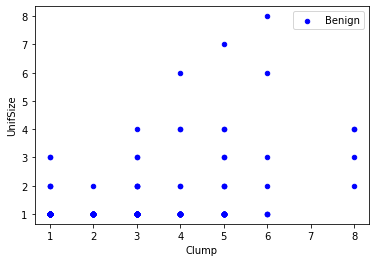

In [9]:
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')

In [10]:
malignant_df = cell_df[cell_df['Class']==4][0:200]
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign', ax=axes)

In [ ]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df.dtypes

In [ ]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X= np.asarray(feature_df)

y=  np.asarray(cell_df['Class'])

y[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(137,)

In [ ]:
from sklearn import svm
svm.SVC(kernel= 'linear', gamma = 'auto', C=2)


classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [ ]:
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64